## Import Lib

In [132]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Generate my kernel

In [133]:
cross_3x3 = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype=np.uint8) ## สร้างเคอแนล 3x3 แบบ corss (+)
print("Kernel Cross 3x3")
print(cross_3x3)

rect_3x3 = np.ones((3,3),dtype=np.uint8) ## สร้างเคอแนล 3x3 แบบ Rectangle
print("Kernel Rectangle 3x3")
print(rect_3x3)

custom_3x3 = np.array([[1,0,1],[0,1,0],[1,0,1]],dtype=np.uint8) ## สร้างเคอแนล 3x3 แบบ ของเราเอง 
print("Kernel My custom 3x3")
print(custom_3x3)

Kernel Cross 3x3
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Kernel Rectangle 3x3
[[1 1 1]
 [1 1 1]
 [1 1 1]]
Kernel My custom 3x3
[[1 0 1]
 [0 1 0]
 [1 0 1]]


## Use cv.getStructuringElement( )

In [134]:
##สร้าง kernel แบบ Auto แค่พิมพ์ขนาด kernel ข้างหลัง 3x3
rect3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
cross3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
ellipse3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))

##สร้าง kernel แบบ Auto แค่พิมพ์ขนาด kernel ข้างหลัง 5x5
rect5x5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
cross5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
ellipse5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

print("kernel 3 x 3")
print(rect3x3)
print(cross3x3)
print(ellipse3x3)

print("kernel 5 x 5")
print(rect5x5)
print(cross5x5)
print(ellipse5x5)

kernel 3 x 3
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
kernel 5 x 5
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


## Load Circuirt Image and Change to Gray Color

(<matplotlib.image.AxesImage at 0x273d30b2d60>, ([], []), ([], []))

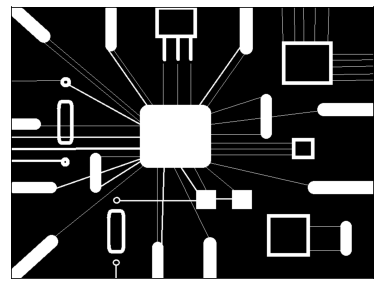

In [135]:
src = cv.imread("./circuit.png")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY) ## ทำให้ภาพเป็นสีขาวเทา ก่อนจะไปทำให้เป็นสีขาวดำ
_, bin_img = cv.threshold(gray_img,127,255,cv.THRESH_BINARY) ## ทำให้ภาพเป็นสีขาวดำ ตัดค่าสีที่ 127
plt.imshow(bin_img,cmap="gray"), plt.xticks([]), plt.yticks([])

In [136]:
print(bin_img) ## โชว์ค่าสีของภาพที่ตัดด้วยค่า 127 

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


## Test Eroded

In [137]:
## กัดรูป
eroded_rect3x3_img = cv.erode(bin_img, rect3x3, iterations = 3) ## ทำ rect3x3 3 รอบ
eroded_cross3x3_img = cv.erode(bin_img, cross3x3, iterations = 3) ## ทำ cross3x3 3 รอบ
eroded_ellipse3x3_img = cv.erode(bin_img, ellipse3x3, iterations = 3) ## ทำ ellipse3x3 3 รอบ

## Show Test Eroded

Original Binary


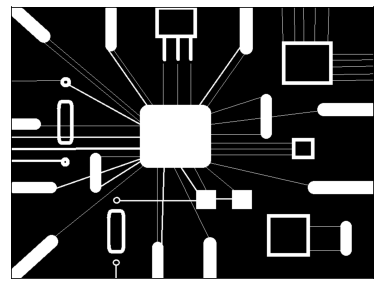

Result from eroded_rect3x3


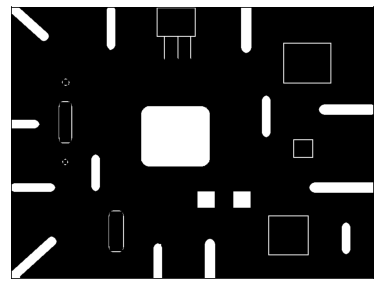

Result from eroded_cross3x3


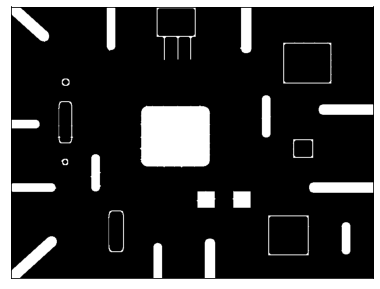

Result from eroded_ellipse3x3


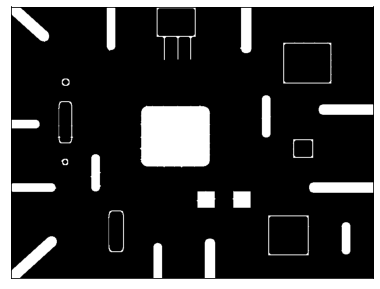

In [138]:
print("Original Binary")
plt.imshow(bin_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_rect3x3")
plt.imshow(eroded_rect3x3_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_cross3x3")
plt.imshow(eroded_cross3x3_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_ellipse3x3")
plt.imshow(eroded_ellipse3x3_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()

## Test Dilate

In [139]:
## พอกรูป
dilate_rect3x3_img = cv.dilate(bin_img, rect3x3, iterations = 1)
dilate_cross3x3_img = cv.dilate(bin_img, cross3x3, iterations = 1)
dilate_ellipse3x3_img = cv.dilate(bin_img, ellipse3x3, iterations = 1)

## Show Test Dilate

Original Binary


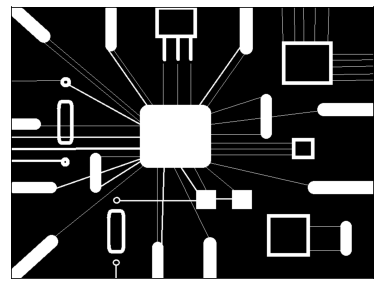

Result from dilate_rect3x3


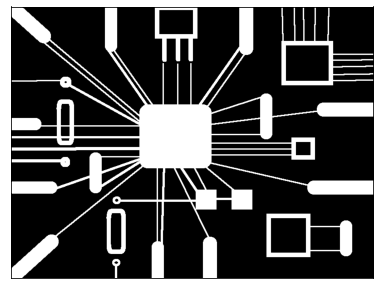

Result from dilate_cross3x3


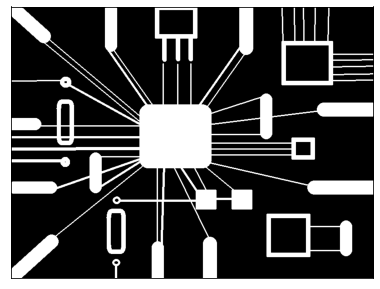

Result from dilate_ellipse3x3


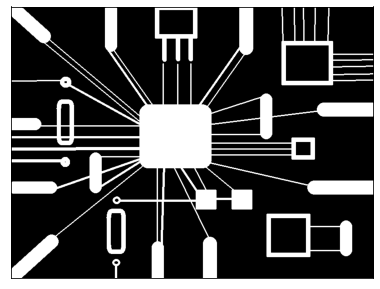

In [140]:
print("Original Binary")
plt.imshow(bin_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilate_rect3x3")
plt.imshow(dilate_rect3x3_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilate_cross3x3")
plt.imshow(dilate_cross3x3_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilate_ellipse3x3")
plt.imshow(dilate_ellipse3x3_img, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.show()

## Result Eroded

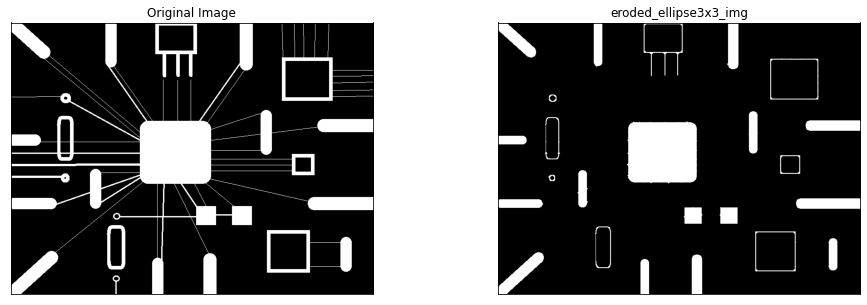

In [144]:
eroded_ellipse3x3_img = cv.erode(bin_img, ellipse3x3, iterations = 3) ## กัดแบบ ellipse 3x3 3 รอบ

## แสดงผลลัพธ์แนวนอน
plt.subplot(121),plt.imshow(bin_img,cmap='gray'),plt.title('Original Image') ## รูปต้นฉบับ
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(eroded_ellipse3x3_img,cmap='gray'),plt.title('eroded_ellipse3x3_img') ## รูปที่กัดแล้ว
plt.xticks([]), plt.yticks([])
plt.show()

## Result Dilate

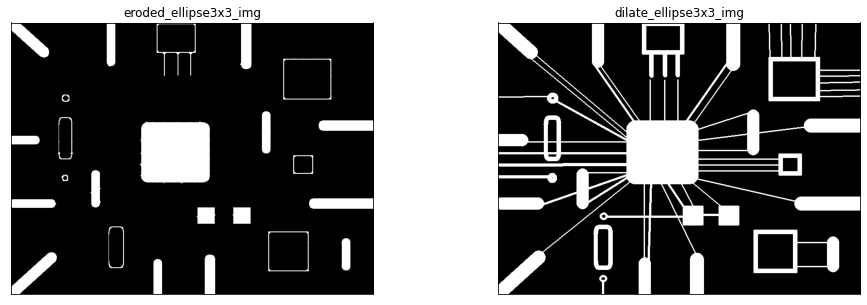

In [145]:

dilate_ellipse3x3_img = cv.dilate(bin_img, ellipse3x3, iterations = 1) ## พอกแบบ ellipse 3x3 1 รอบ

## แสดงผลลัพธ์แนวนอน
plt.subplot(121),plt.imshow(eroded_ellipse3x3_img,cmap='gray'),plt.title('eroded_ellipse3x3_img') ## รูปต้นฉบับ
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilate_ellipse3x3_img,cmap='gray'),plt.title('dilate_ellipse3x3_img') ## รูปที่พอกแล้ว
plt.xticks([]), plt.yticks([])
plt.show()